In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# arr = np.array([1,2,3,4])

# np.save("./arr.npy", arr)
# arr = np.load("./arr.npy")

In [4]:
X = np.load("../Data/KNN/Classification/X_data.npy")
y = np.load("../Data/KNN/Classification/Y_data.npy")

In [5]:
X.shape, y.shape

((500, 2), (500,))

In [14]:
np.unique(y)

array([0, 1, 2])

In [ ]:
# data => shape 500 x 3
# X = data[:, 0:2]
# y = data[:, 2]

In [18]:
features_1 = X[:, 0]
features_2 = X[:, 1]

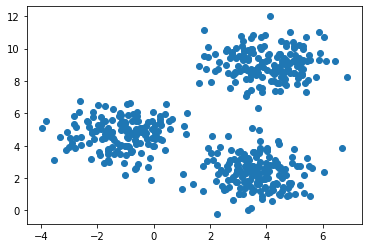

In [19]:
plt.scatter(features_1, features_2)
plt.show()

In [28]:
def get_indexes(class_no):
    indexes = []

    for i in range(len(y)): # range(y.shape[0])
        if(y[i] == class_no):
            indexes.append(i)
    
    return indexes


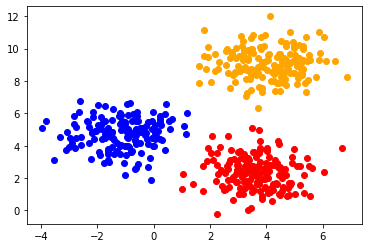

In [29]:
plt.scatter(X[get_indexes(0)][:, 0], X[get_indexes(0)][:, 1], c="red")
plt.scatter(X[get_indexes(1)][:, 0], X[get_indexes(1)][:, 1], c="orange")
plt.scatter(X[get_indexes(2)][:, 0], X[get_indexes(2)][:, 1], c="blue")
plt.show()

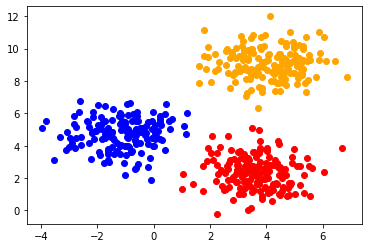

In [39]:
# indexes = (y == 2)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c="red")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c="orange")
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], c="blue")
plt.show()

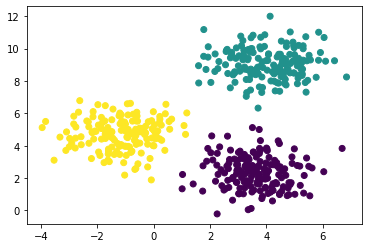

In [45]:
def get_color():
    colors = []
    for i in range(len(y)):
        if y[i] == 0:
            # colors.append("red")
            colors.append(0)
        elif y[i] == 1:
            # colors.append("orange")
            colors.append(1)
        else:
            # colors.append("blue")
            colors.append(2)
    return colors

plt.scatter(features_1, features_2, c=get_color())
plt.show()

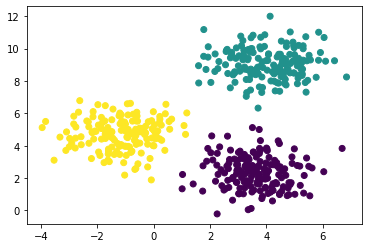

In [46]:
plt.scatter(features_1, features_2, c=y)
plt.show()

In [48]:
X_test = np.array([[-2, 5]])

In [49]:
X_test.shape

(1, 2)

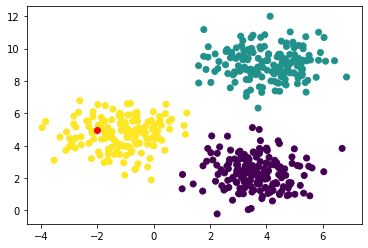

In [47]:
plt.scatter(features_1, features_2, c=y)
plt.scatter([-2], [5], c="red")
plt.show()

In [66]:
arr = [(1,3), (3, 5), (4, 3), (5, 2), (7, 3), (9, 5), (-1, 1), (-3, 13), (-3, 10)]
# arr = [1,2,3,4,5]
def func(x):
    return x[0]

sorted(arr, key=func)

[(-3, 13), (-3, 10), (-1, 1), (1, 3), (3, 5), (4, 3), (5, 2), (7, 3), (9, 5)]

In [84]:
def distance(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

def predict(test_point, k=5): #test_point => tuple

    distances = []
    for i in range(len(X)):
        p1 = (X[i][0], X[i][1]) 
        distances.append((distance(p1, test_point), i)) 
    def key(x):
        return x[0]

    distances = sorted(distances, key=key)

    closest_k_points = distances[:k]

    votes = {}

    for point in closest_k_points:
        index = point[1]
        if votes.get(y[index]) is None:
            votes[y[index]] = 1
        else:
            votes[y[index]] += 1
    
    # print("Top k votes:", votes)

    prediction = {"class": None, "votes": 0} 
    for cls, vote in votes.items():
        if vote > prediction["votes"]:
            prediction["class"] = cls
            prediction["votes"] = vote

    return prediction["class"], prediction["votes"]/k

In [79]:
cls, confidence = predict((-2, 5), 10)
print("Predicted Class:", cls, "Confidence:", confidence)

Top k votes: {2: 10}
Predicted Class: 2 Confidence: 1.0


In [80]:
f1, f2 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

In [81]:
f1, f2= f1.flatten(), f2.flatten()

In [85]:
predictions = []
for i in range(len(f1)):
    predictions.append(predict((f1[i], f2[i]), 10)[0])

plt.scatter(f1, f2, c=predictions)
plt.show()


KeyboardInterrupt: 

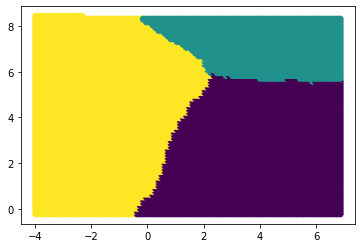

In [88]:
plt.scatter(f1[:len(predictions)], f2[:len(predictions)], c=predictions)
plt.show()

https://colab.research.google.com/drive/1nn0rebiqIakRzbDpkBs1f2ujD--gqAti#scrollTo=QYZGmccsKCWK